In [98]:
! python3 -m pip install --upgrade pip
! python3 -m pip install  --upgrade SpeechRecognition
! python3 -m pip install  --upgrade pydub
! python3 -m pip install  --upgrade sklearn

In [221]:
import IPython.display as ipd
import librosa
import librosa.display
import kapre
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import os
import pandas as pd
import random
import re
import shutil
import speech_recognition as sr
import tensorflow as tf
from os import listdir
from os.path import isfile, join
from os import path
from plotnine import *
from pydub import AudioSegment
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC

# Transcribe audio data to txt data

In [100]:
# TODO make an input from user
data_path = '/tf/dementia/0extra/ADReSS-IS2020-train/ADReSS-IS2020-data/train'

audio_path_cc = data_path + '/Full_wave_enhanced_audio/cc/'
audio_path_cd = data_path + '/Full_wave_enhanced_audio/cd/'


text_path_cc = data_path + '/transcription/cc/'
text_path_cd = data_path + '/transcription/cd/'

lang_ = 'en-US'

r = sr.Recognizer()

In [184]:
meta_cc = pd.read_csv(data_path + '/cc_meta_data.txt', sep=";", header=0, 
                      names = ['ID', 'Age', 'Gender', 'MMSE'])
meta_cd = pd.read_csv(data_path + '/cd_meta_data.txt', sep=";", header=0, 
                      names = ['ID', 'Age', 'Gender', 'MMSE'])

meta = meta_cc.assign(Group = 'cc').append(meta_cd.assign(Group = 'cd')).reset_index()

meta['ID'] = meta['ID'].str.strip()

meta

,index,ID,Age,Gender,MMSE,Group
0,0,S001,74,male,NA,cc
1,1,S002,62,female,30,cc
2,2,S003,69,female,29,cc
3,3,S004,71,female,30,cc
4,4,S005,74,female,30,cc
...,...,...,...,...,...,...
103,49,S150,58,male,20,cd
104,50,S151,72,male,24,cd
105,51,S153,68,female,12,cd
106,52,S154,65,female,20,cd


In [185]:
sum(meta.MMSE == ' NA')

1

In [187]:
meta.MMSE = pd.to_numeric(meta.MMSE.replace(' NA', 30))
meta

,index,ID,Age,Gender,MMSE,Group
0,0,S001,74,male,30,cc
1,1,S002,62,female,30,cc
2,2,S003,69,female,29,cc
3,3,S004,71,female,30,cc
4,4,S005,74,female,30,cc
...,...,...,...,...,...,...
103,49,S150,58,male,20,cd
104,50,S151,72,male,24,cd
105,51,S153,68,female,12,cd
106,52,S154,65,female,20,cd


In [104]:
meta.dtypes

index      int64
ID        object
Age        int64
Gender    object
MMSE       int64
Group     object
dtype: object

In [105]:
def startConversion(path, filename, lang = lang_):
                
    # Create output file name
    output_dir = path + 'output_text/'
    output_file = '.'.join(filename.split(sep='.')[:-1]) + '.txt'
    output_file_path = output_dir + output_file
    
    # If output file does not exist, continue
    if os.path.exists(output_file_path):
        print("Sorry, " + output_file_path + " already exists")
    else:
        full_path = path + filename

        with sr.AudioFile(full_path) as source:
            print('Transcribing file: ' + str(filename) + ' in path: ' + str(full_path))
            audio_text = r.listen(source)
            # recognize_() method will throw a request error if the API is unreachable, hence using exception handling
            try:

                # using google speech recognition
                # print('Converting audio transcripts into text ...')
                text = r.recognize_google(audio_text)

                # Create output directory
                if not os.path.exists(output_dir):
                    os.makedirs(output_dir)

                with open(output_file_path, 'w') as f:
                    f.write(text)
                print('Finished transcribing text file ' + str(output_file) + ' at location ' + output_file_path)

            except Exception as e:
                print('Error: ' + str(e) + ' <- this guy')

In [106]:
# Running for CC path
onlyfiles = [f for f in listdir(audio_path_cc) if isfile(join(audio_path_cc, f))]

for filename in onlyfiles:
    startConversion(path = audio_path_cc, filename = filename)

Sorry, /tf/dementia/0extra/ADReSS-IS2020-train/ADReSS-IS2020-data/train/Full_wave_enhanced_audio/cc/output_text/S001.txt already exists
Sorry, /tf/dementia/0extra/ADReSS-IS2020-train/ADReSS-IS2020-data/train/Full_wave_enhanced_audio/cc/output_text/S002.txt already exists
Sorry, /tf/dementia/0extra/ADReSS-IS2020-train/ADReSS-IS2020-data/train/Full_wave_enhanced_audio/cc/output_text/S003.txt already exists
Sorry, /tf/dementia/0extra/ADReSS-IS2020-train/ADReSS-IS2020-data/train/Full_wave_enhanced_audio/cc/output_text/S004.txt already exists
Transcribing file: S005.wav in path: /tf/dementia/0extra/ADReSS-IS2020-train/ADReSS-IS2020-data/train/Full_wave_enhanced_audio/cc/S005.wav
Error:  <- this guy
Transcribing file: S006.wav in path: /tf/dementia/0extra/ADReSS-IS2020-train/ADReSS-IS2020-data/train/Full_wave_enhanced_audio/cc/S006.wav
Error:  <- this guy
Transcribing file: S007.wav in path: /tf/dementia/0extra/ADReSS-IS2020-train/ADReSS-IS2020-data/train/Full_wave_enhanced_audio/cc/S007.wav

In [107]:
# Running for CD path
onlyfiles = [f for f in listdir(audio_path_cd) if isfile(join(audio_path_cd, f))]

for filename in onlyfiles:
    startConversion(path = audio_path_cd, filename = filename)

Sorry, /tf/dementia/0extra/ADReSS-IS2020-train/ADReSS-IS2020-data/train/Full_wave_enhanced_audio/cd/output_text/S079.txt already exists
Sorry, /tf/dementia/0extra/ADReSS-IS2020-train/ADReSS-IS2020-data/train/Full_wave_enhanced_audio/cd/output_text/S080.txt already exists
Sorry, /tf/dementia/0extra/ADReSS-IS2020-train/ADReSS-IS2020-data/train/Full_wave_enhanced_audio/cd/output_text/S081.txt already exists
Sorry, /tf/dementia/0extra/ADReSS-IS2020-train/ADReSS-IS2020-data/train/Full_wave_enhanced_audio/cd/output_text/S082.txt already exists
Sorry, /tf/dementia/0extra/ADReSS-IS2020-train/ADReSS-IS2020-data/train/Full_wave_enhanced_audio/cd/output_text/S083.txt already exists
Sorry, /tf/dementia/0extra/ADReSS-IS2020-train/ADReSS-IS2020-data/train/Full_wave_enhanced_audio/cd/output_text/S084.txt already exists
Sorry, /tf/dementia/0extra/ADReSS-IS2020-train/ADReSS-IS2020-data/train/Full_wave_enhanced_audio/cd/output_text/S086.txt already exists
Sorry, /tf/dementia/0extra/ADReSS-IS2020-train/A

In [142]:
text_dict = {"ID": [], "Text": []}

# CC path
onlytextfiles_cc = [f for f in listdir(audio_cc_text_path) if isfile(join(audio_cc_text_path, f))]
        
for filename in onlytextfiles_cc:
    just_name = filename.split(sep='.')[:-1][0]
    # print("Adding to dictionary: " + str(just_name))
    full_text_file_path = audio_cc_text_path + filename

    # Make all text lowercase
    # Remove special characters
    with open(full_text_file_path, "r") as file:
        data = file.read().replace('\n', '')
        text_dict["ID"].append(just_name)
        text_dict["Text"].append(data)

# CD path
onlytextfiles_cd = [f for f in listdir(audio_cd_text_path) if isfile(join(audio_cd_text_path, f))]

for filename in onlytextfiles_cd:
    just_name = filename.split(sep='.')[:-1][0]
    # print("Adding to dictionary: " + just_name)
    full_text_file_path = audio_cd_text_path + filename

    # Make all text lowercase
    # Remove special characters
    with open(full_text_file_path, "r") as file:
        data = file.read().replace('\n', '')
        text_dict["ID"].append(just_name)
        text_dict["Text"].append(data)

print("Done!")

Adding to dictionary: S001
Adding to dictionary: S002
Adding to dictionary: S003
Adding to dictionary: S004
Adding to dictionary: S009
Adding to dictionary: S011
Adding to dictionary: S012
Adding to dictionary: S013
Adding to dictionary: S015
Adding to dictionary: S016
Adding to dictionary: S017
Adding to dictionary: S018
Adding to dictionary: S019
Adding to dictionary: S020
Adding to dictionary: S021
Adding to dictionary: S024
Adding to dictionary: S025
Adding to dictionary: S027
Adding to dictionary: S028
Adding to dictionary: S029
Adding to dictionary: S030
Adding to dictionary: S032
Adding to dictionary: S033
Adding to dictionary: S034
Adding to dictionary: S035
Adding to dictionary: S036
Adding to dictionary: S038
Adding to dictionary: S039
Adding to dictionary: S040
Adding to dictionary: S041
Adding to dictionary: S043
Adding to dictionary: S048
Adding to dictionary: S051
Adding to dictionary: S052
Adding to dictionary: S055
Adding to dictionary: S056
Adding to dictionary: S058
A

In [143]:
# Convert the dictionary into DataFrame 
text_df = pd.DataFrame(text_dict)
text_df

,ID,Text
0,S001,tell me everything that you see going on in th...
1,S002,picture
2,S003,okay there is a little boy and he's getting he...
3,S004,Homedics laugh you ready well the sink is over...
4,S009,boy is taking cookies from the cookie jar givi...
...,...,...
97,S151,everything that you see happening in that pict...
98,S153,and tell me everything that you see happening ...
99,S154,okay and the boys getting in the cookie jar is...
100,S156,can you tell me now this one is in the cookie ...


In [188]:
merged_data = pd.merge(meta, text_df, on = "ID", how = "inner")
merged_data

,index,ID,Age,Gender,MMSE,Group,Text
0,0,S001,74,male,30,cc,tell me everything that you see going on in th...
1,1,S002,62,female,30,cc,picture
2,2,S003,69,female,29,cc,okay there is a little boy and he's getting he...
3,3,S004,71,female,30,cc,Homedics laugh you ready well the sink is over...
4,7,S009,67,male,30,cc,boy is taking cookies from the cookie jar givi...
...,...,...,...,...,...,...,...
96,49,S150,58,male,20,cd,now the boy on the chair is falling reaching u...
97,50,S151,72,male,24,cd,everything that you see happening in that pict...
98,51,S153,68,female,12,cd,and tell me everything that you see happening ...
99,52,S154,65,female,20,cd,okay and the boys getting in the cookie jar is...


# Split dataset

In [209]:
# Vectorize text data so model can take it in
# Convert to 'dense array' (NP array)
# TODO make it so english is not hardcoded, flexible for all languages
# vectorizer = CountVectorizer(stop_words='english', analyzer='word', ngram_range=(1, 1))
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(merged_data["Text"]).toarray().astype(np.int)
y = np.array(merged_data["MMSE"].values).astype(np.int)

# dividing X, y into train and test data 
# 80/20 training/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Training data set is length: " +str(len(train)))
print("Test data set is length: " +str(len(test)))

Training data set is length: 80
Test data set is length: 21


# Train and predict on Logistic regression

In [210]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [219]:
# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print(score)

0.19047619047619047


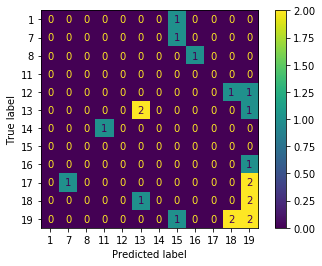

In [222]:
# Create and show confusion matrix
plot_confusion_matrix(logisticRegr, X_test, y_test)
plt.show()  

# Reduce output labels by bucketizing

In [ ]:
# https://pubmed.ncbi.nlm.nih.gov/16473978/